In [160]:
import numpy as np
from tabulate import tabulate

from pyfdm import methods
from pyfdm.methods import utils
from pyfdm.TFN import TFN
from pyfdm.graphs import single_tfn_plot, tfn_membership_plot, tfn_criteria_plot, s_norm_tfn_plot
from pyfdm import weights as f_weights
from pyfdm import correlations as corrs
from pyfdm.helpers import rank, generate_fuzzy_matrix

import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

# Input data

To perform the multi-criteria evaluation, the decision matrix needs to be defined. It can be determined based on the real data, or created with the method provided in the library.

In [161]:
# real data matrix
real_matrix = np.array([
    [[5, 7, 9], [5, 7, 9], [7, 9, 9]],
    [[1, 3, 5], [3, 5, 7], [3, 5, 7]],
    [[1, 1, 3], [1, 3, 5], [1, 3, 5]],
    [[7, 9, 9], [7, 9, 9], [7, 9, 9]]
])

# randomly generated matrix
# 5 alternatives
# 4 criteria
# lower bound = 5
# upper bound = 10
random_matrix = generate_fuzzy_matrix(5, 4, 5, 10)
random_matrix

array([[[6.86 , 7.668, 8.874],
        [6.24 , 7.576, 8.856],
        [7.406, 7.491, 8.739],
        [6.042, 9.201, 9.594]],

       [[8.548, 9.743, 9.826],
        [5.898, 8.25 , 9.78 ],
        [5.321, 5.875, 7.233],
        [7.737, 7.988, 9.468]],

       [[7.284, 8.336, 9.148],
        [7.38 , 8.961, 9.485],
        [5.186, 6.063, 7.842],
        [5.742, 6.829, 7.196]],

       [[8.019, 8.117, 8.684],
        [5.558, 7.964, 8.283],
        [5.042, 7.974, 8.843],
        [6.167, 6.635, 8.55 ]],

       [[5.821, 5.869, 7.805],
        [5.095, 5.492, 7.695],
        [7.633, 8.037, 9.974],
        [7.281, 7.351, 8.37 ]]])

# Normalization

Data normalization allows for comparing numbers with each other. It converts the range of values that they fit in range between 0 and 1. Below the usage examples of methods implemented in the library. Types parameter is responsible for the direction of the normalization. One columns' values could be more preferred is the values are lower (`-1`), other one could be more preferred if the values are greater (`1`).

In [162]:
normalizations = {
    'COCOSO': utils.normalizations.cocoso_normalization,
    'Sum': utils.normalizations.sum_normalization,
    'Max': utils.normalizations.max_normalization,
    'Linear': utils.normalizations.linear_normalization,
    'Minmax': utils.normalizations.minmax_normalization,
    'Vector': utils.normalizations.vector_normalization,
    'SAW': utils.normalizations.saw_normalization,
    'SQRT': utils.normalizations.sqrt_normalization,
    'WASPAS': utils.normalizations.waspas_normalization,
}

types = np.array([1, -1, 1])

for name, norm in normalizations.items():
    nmatrix = norm(real_matrix, types)
    print(f'{name} \n {nmatrix[:2]}')

COCOSO 
 [[[0.5  0.75 1.  ]
  [0.   0.25 0.5 ]
  [0.75 1.   1.  ]]

 [[0.   0.25 0.5 ]
  [0.25 0.5  0.75]
  [0.25 0.5  0.75]]]
Sum 
 [[[0.167 0.269 0.5  ]
  [0.354 0.181 0.066]
  [0.269 0.45  0.643]]

 [[0.033 0.115 0.278]
  [0.59  0.254 0.085]
  [0.115 0.25  0.5  ]]]
Max 
 [[[0.714 0.778 1.   ]
  [0.286 0.222 0.   ]
  [1.    1.    1.   ]]

 [[0.143 0.333 0.556]
  [0.571 0.444 0.222]
  [0.429 0.556 0.778]]]
Linear 
 [[[0.556 0.778 1.   ]
  [0.111 0.143 0.2  ]
  [0.778 1.    1.   ]]

 [[0.111 0.333 0.556]
  [0.143 0.2   0.333]
  [0.333 0.556 0.778]]]
Minmax 
 [[[ 0.5   0.75  1.  ]
  [-0.    0.25  0.5 ]
  [ 0.75  1.    1.  ]]

 [[ 0.    0.25  0.5 ]
  [ 0.25  0.5   0.75]
  [ 0.25  0.5   0.75]]]
Vector 
 [[[0.246 0.345 0.443]
  [0.227 0.318 0.409]
  [0.301 0.387 0.387]]

 [[0.049 0.148 0.246]
  [0.136 0.227 0.318]
  [0.129 0.215 0.301]]]
SAW 
 [[[0.556 0.778 1.   ]
  [0.556 0.778 1.   ]
  [0.778 1.    1.   ]]

 [[0.111 0.333 0.556]
  [0.333 0.556 0.778]
  [0.333 0.556 0.778]]]
SQRT 
 [[[0.

# Distance

Distance is a measure that allows for indicating how far are two Triangular Fuzzy Numbers from each other. Different techniques have been developed to this end. The measures implemented in the library and their usage are presented below.

In [163]:
distances = {
    'Euclidean': utils.distances.euclidean_distance,
    'Weighted Euclidean': utils.distances.weighted_euclidean_distance,
    'Hamming': utils.distances.hamming_distance,
    'Weighted Hamming': utils.distances.weighted_hamming_distance,
    'Vertex': utils.distances.vertex_distance,
    'Tran-Duckstein': utils.distances.tran_duckstein_distance,
    'L-R': utils.distances.lr_distance,
    'Mahdavi': utils.distances.mahdavi_distance,
    'Chebyshev': utils.distances.chebyshev_distance,
    'Canberra': utils.distances.canberra_distance,
}

x = np.array([2, 4, 5])
y = np.array([1, 2, 3])

for name, distance in distances.items():
    d = distance(x, y)
    print(f'{name}: {d}')

Euclidean: 3.0
Weighted Euclidean: 1.8027756377319946
Hamming: 5
Weighted Hamming: 1.75
Vertex: 1.7320508075688772
Tran-Duckstein: 6.444444444444445
L-R: 15.25
Mahdavi: 1.7795130420052185
Chebyshev: 2
Canberra: 0.9166666666666666


# Defuzzification

To create a crisp ranking from the calculations performed in fuzzy environment, the obtained results should be defuzzified. Different techniques can be used to achieve this. The implemented methods and the example of their usage are presented below.

In [164]:
defuzzifications = {
    'Mean': utils.defuzzifications.mean_defuzzification,
    'Mean Area': utils.defuzzifications.mean_area_defuzzification,
    'Graded Mean Average': utils.defuzzifications.graded_mean_average_defuzzification,
    'Weighted Mean': utils.defuzzifications.weighted_mean_defuzzification,
    'Bisector': utils.defuzzifications.bisector_defuzzification,                                                                                         
    'Height': utils.defuzzifications.height_defuzzification,                                                                                         
    'LOM': utils.defuzzifications.lom_defuzzification,                                                                                         
    'SOM': utils.defuzzifications.som_defuzzification,                                                                                         
}

x = np.array([0.2, 0.55, 1.1])

for name, defuzzy in defuzzifications.items():
    d = defuzzy(x)
    print(f'{name}: {d}')

Mean: 0.6166666666666667
Mean Area: 0.6000000000000001
Graded Mean Average: 0.5833333333333334
Weighted Mean: 0.6000000000000001
Bisector: 0.65
Height: 0.55
LOM: 1.1
SOM: 0.2


# Weights

Criteria weights in multi-criteria problems are responsible for the importance of each parameter taken into consideration. The greater value assigned to the given criterion, the more important it will be in the assessment. For the purpose of weights definition, 4 methods from the library can be used. They are based on the statistical approach, which makes it possible to define the weights objectively, relying only on data diversity.

In [165]:
weights_methods = {
    'Equal': f_weights.equal_weights,
    'Shannon Entropy' : f_weights.shannon_entropy_weights,
    'STD': f_weights.standard_deviation_weights,
    'Variance': f_weights.variance_weights
}

for name, method in weights_methods.items():
    w = method(random_matrix)
    print(f'{name} \n {w}')

Equal 
 [[0.25 0.25 0.25]
 [0.25 0.25 0.25]
 [0.25 0.25 0.25]
 [0.25 0.25 0.25]]
Shannon Entropy 
 [[0.296 0.268 0.256]
 [0.222 0.254 0.254]
 [0.228 0.227 0.243]
 [0.254 0.251 0.247]]
STD 
 [[0.259 0.292 0.204]
 [0.212 0.273 0.237]
 [0.316 0.218 0.29 ]
 [0.212 0.217 0.269]]
Variance 
 [[0.261 0.335 0.163]
 [0.175 0.293 0.221]
 [0.388 0.187 0.331]
 [0.175 0.185 0.285]]


# Evaluation 

Different techniques from the group of Fuzzy Multi-Criteria Decision Analysis methods based on the Triangular Fuzzy Numbers can be used to assess the alternatives. The library contains 10 methods which can be used for this purpose. The examples of their application are presented below.

## Decision matrix

Decision matrix represents the alternatives taken into consideration in the problem. Rows represent amount of alternatives, when columns describes the amount of criteria in the given problem. In the case presented below, we have 4 alternatives and 3 criteria. Moreover, all elements in the matrix should be represent as the Triangular Fuzzy Number.

In [166]:
matrix = np.array([
    [[3, 4, 5],[4, 5, 6],[8, 9, 9]],
    [[6, 7, 8],[4, 5, 6],[1, 2, 3]],
    [[5, 6, 7],[2, 3, 4],[3, 4, 5]],
    [[5, 6, 8],[2, 3, 4],[2, 3, 4]],
    [[7, 8, 9],[7, 8, 9],[5, 6, 7]],
])


## Weights

Weights can be defined objectively, as shown above with the given examples. However, the weights can be also defined directly based on expert knowledge. The library is implemented in a way to handle both crisp and fuzzy weights. Amount of weights should equal the criteria amount. They can be determined as follow.

### Example 1
Crisp weights

In [167]:
crisp_weights = np.array([0.4, 0.4, 0.2])

### Example 2
Triangular Fuzzy Weights

In [168]:
fuzzy_weights = np.array([[5, 7, 9], [7, 9, 9], [3, 5, 7]])


## Criteria 

Criteria types are ment to reflect the direction of the values that is preferable in the problem. If the values for given criterion should be as big as possible, it is then a profit type and represent as `1` in the criteria types array. If the values should be as low as possible, it is then cost and should be represent as `-1` in the array. Moreover, the criteria types amount should equal amount of criteria in the decision matrix.

In [169]:
types = np.array([1, -1, 1])

## Fuzzy ARAS

In [170]:
f_aras = methods.fARAS()

Fuzzy ARAS evaluation results with crisp and fuzzy weights  

In [171]:
print(f'Crisp weights: {f_aras(matrix, crisp_weights, types)}')
print(f'Fuzzy weights: {f_aras(matrix, fuzzy_weights, types)}')

Crisp weights: [0.835 0.856 1.114 1.113 0.893]
Fuzzy weights: [0.879 0.834 1.103 1.097 0.896]


The ranking based on the obtained preferences can be calculated directly from the fARAS object.

In [172]:
f_aras.rank()

array([4., 5., 1., 2., 3.])

Or with the `rank` method.

In [173]:
rank(f_aras(matrix, fuzzy_weights, types))

array([4., 5., 1., 2., 3.])

We can also use ARAS method with different normalizations. Default, it is a `sum_normalization`.

In [174]:
aras = {
    'Sum': methods.fARAS(utils.normalizations.sum_normalization),
    'Max': methods.fARAS(utils.normalizations.max_normalization),
    'Linear': methods.fARAS(utils.normalizations.linear_normalization),
    'Minmax': methods.fARAS(utils.normalizations.minmax_normalization),
    'Vector': methods.fARAS(utils.normalizations.vector_normalization),
    'SAW': methods.fARAS(utils.normalizations.saw_normalization)
}

For every normalization technique, we can perform assessment to obtain results and check if the type of normalization impacts the outcome.

In [175]:
results = {}
for name, function in aras.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [176]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method      A1    A2    A3    A4    A5
--------  ----  ----  ----  ----  ----
Sum       0.88  0.83  1.1   1.1   0.9
Max       0.98  0.87  1.06  1.04  0.89
Linear    0.84  0.75  0.96  0.95  0.86
Minmax    0.93  0.88  1.08  1.07  0.89
Vector    0.64  0.56  0.48  0.47  0.85
SAW       0.63  0.57  0.49  0.48  0.85


We can see that different preferences are obtained with different normalizations. To check if the alternatives are ranked at the same place despite used normalization method, we can use the method from the library called `rank` which calculates ascending or descending position order based on given array. Since the ARAS method assess better alternatives with higher values, the order should be descending. 

In [177]:
print(tabulate([[name, *rank(pref, descending=True)] for name, pref in results.items()], 
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method      A1    A2    A3    A4    A5
--------  ----  ----  ----  ----  ----
Sum          4     5     1     2     3
Max          3     5     1     2     4
Linear       4     5     1     2     3
Minmax       3     5     1     2     4
Vector       2     3     4     5     1
SAW          2     3     4     5     1


It can be seen, that the ranking of alternatives is different for different normalization techniques. So the user should bear in mind that different methods can have impact the final result obtained within selected evaluation method.

## Fuzzy COCOSO

In [178]:
f_cocoso = methods.fCOCOSO()
print(f'Preferences: {f_cocoso(matrix, fuzzy_weights, types)}')
print(f'Ranking: {f_cocoso.rank()}')

Preferences: [133.388  30.96   87.659  98.299  96.886]
Ranking: [1. 5. 4. 2. 3.]


Within the COCOSO method we can also use different normalizations, as it was in the previous methods. In addition, we can modify the used normalization and defuzzification techniques. Default, the fCOCOSO method has set the normalization to `cocoso_normalization` and the defuzzification to the `mean_defuzzification`.

In [179]:
cocoso = {
    'Sum': methods.fCOCOSO(utils.normalizations.sum_normalization),
    'Max': methods.fCOCOSO(utils.normalizations.max_normalization),
    'Linear': methods.fCOCOSO(utils.normalizations.linear_normalization),
    'Minmax': methods.fCOCOSO(utils.normalizations.minmax_normalization),
    'Vector': methods.fCOCOSO(utils.normalizations.vector_normalization),
    'SAW': methods.fCOCOSO(utils.normalizations.saw_normalization)
}

In [180]:
results = {}
for name, function in cocoso.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [181]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method          A1       A2       A3       A4        A5
--------  --------  -------  -------  -------  --------
Sum        1200.64   397.55   486.86   569.71   1201.88
Max           5.07     2.44     2.06     2.27      5.66
Linear       46.62    14.91    30.75    33.93     40.68
Minmax      133.39    30.96    87.66    98.3      96.89
Vector    21970     1432.57  3352.53  2207.49  12331.6
SAW          65.58    21.9     13.78    17.84    102.23


In [182]:
print(tabulate([[name, *rank(pref, descending=True)] for name, pref in results.items()], 
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method      A1    A2    A3    A4    A5
--------  ----  ----  ----  ----  ----
Sum          2     5     4     3     1
Max          2     3     5     4     1
Linear       1     5     4     3     2
Minmax       1     5     4     2     3
Vector       1     5     3     4     2
SAW          2     3     5     4     1


## Fuzzy CODAS

In [183]:
f_codas = methods.fCODAS()
print(f'Preferences: {f_codas(matrix, fuzzy_weights, types)}')
print(f'Ranking: {f_codas.rank()}')

Preferences: [  0.3   -27.223  28.96   23.976 -26.013]
Ranking: [3. 5. 1. 2. 4.]


Within the CODAS method we can also use different normalizations, as it was in the ARAS method. In addition, we can use different distance metrics to calculate the alternatives preference. Default the `distance_1` is the `euclidean_distance` and `distance_2` is the `hamming_distance`. While calling the fuzzy CODAS object, the `tau` parameter can be given, which is set to `0.02` as default. It is treated as the threshold parameter while calculating the relative assessment matrix. CODAS also assessed better alternatives with higher preferences.

In [184]:
codas = {
    'Pair 1': methods.fCODAS(distance_1=utils.distances.euclidean_distance, distance_2=utils.distances.hamming_distance),
    'Pair 2': methods.fCODAS(distance_1=utils.distances.weighted_euclidean_distance, distance_2=utils.distances.weighted_hamming_distance),
    'Pair 3': methods.fCODAS(distance_1=utils.distances.vertex_distance, distance_2=utils.distances.lr_distance),
    'Pair 4': methods.fCODAS(distance_1=utils.distances.mahdavi_distance, distance_2=utils.distances.lr_distance),
    
}

Now, when we defined the CODAS object with different pairs of distances, we can calculate the results.

In [185]:
results = {}
for name, function in codas.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [186]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method       A1       A2      A3      A4       A5
--------  -----  -------  ------  ------  -------
Pair 1     0.3    -27.22   28.96   23.98   -26.01
Pair 2     0.55   -11.46   12.67    9.81   -11.57
Pair 3    15.6   -161.23  148.14  142.27  -144.78
Pair 4    15.8   -157.83  148.41  141.97  -148.34


We can see, that different distance metrics also have impact on the final results.

## Fuzzy COPRAS

In [187]:
f_copras = methods.fCOPRAS()
print(f'Preferences: {f_copras(matrix, fuzzy_weights, types)}')
print(f'Ranking: {f_copras.rank()}')

Preferences: [0.804 0.736 0.993 1.    0.824]
Ranking: [4. 5. 2. 1. 3.]


As in the case of the ARAS method, in the COPRAS technique, we can also modify the used normalization method. The `saw_normalization` is set as default. Similarly to previous methods, better alternatives are assessed with higher preferences.

In [188]:
copras = {
    'Sum': methods.fCOPRAS(utils.normalizations.sum_normalization),
    'Max': methods.fCOPRAS(utils.normalizations.max_normalization),
    'Linear': methods.fCOPRAS(utils.normalizations.linear_normalization),
    'Minmax': methods.fCOPRAS(utils.normalizations.minmax_normalization),
    'Vector': methods.fCOPRAS(utils.normalizations.vector_normalization),
    'SAW': methods.fCOPRAS(utils.normalizations.saw_normalization)
}

In [189]:
results = {}
for name, function in copras.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [190]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method      A1    A2    A3    A4    A5
--------  ----  ----  ----  ----  ----
Sum       0.7   0.69  0.59  0.61  1
Max       1     0.88  0.92  0.93  0
Linear    0.73  0.67  0.59  0.59  1
Minmax    0.97  0.93  0.94  1     1
Vector    0.81  0.71  1     1     0.79
SAW       0.8   0.74  0.99  1     0.82


## Fuzzy EDAS

In [191]:
f_edas = methods.fEDAS()
print(f'Preferences: {f_edas(matrix, fuzzy_weights, types)}')
print(f'Ranking: {f_edas.rank()}')

Preferences: [0.691 0.292 0.698 0.74  0.468]
Ranking: [3. 5. 2. 1. 4.]


In case of using the fuzzy EDAS method, we can modify the used defuzzification technique. Default, the fEDAS method has set the defuzzification to the `mean_defuzzification`. EDAS also evaluate better alternatives with higher preferences.

In [192]:
edas = {
    'Mean': methods.fEDAS(defuzzify=utils.defuzzifications.mean_defuzzification),
    'Mean Area': methods.fEDAS(defuzzify=utils.defuzzifications.mean_area_defuzzification),
    'Graded Mean Average': methods.fEDAS(defuzzify=utils.defuzzifications.graded_mean_average_defuzzification),
    'Weighted Mean': methods.fEDAS(defuzzify=utils.defuzzifications.weighted_mean_defuzzification)                                                                                            
}


After fEDAS object definition, we can calculate the results based on using different defuzzification methods.

In [193]:
results = {}
for name, function in edas.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [194]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method                 A1    A2    A3    A4    A5
-------------------  ----  ----  ----  ----  ----
Mean                 0.69  0.29  0.7   0.74  0.47
Mean Area            0.71  0.3   0.72  0.65  0.45
Graded Mean Average  0.73  0.31  0.75  0.67  0.42
Weighted Mean        0.71  0.3   0.72  0.65  0.45


It can be noticed that the results are highly similar while using different methods to defuzzify fuzzy numbers and obtain crisp values.

## Fuzzy MABAC

In [195]:
f_mabac = methods.fMABAC()
print(f'Preferences: {f_mabac(matrix, fuzzy_weights, types)}')
print(f'Ranking: {f_mabac.rank()}')

Preferences: [-0.061 -0.644  1.82   1.695 -0.549]
Ranking: [3. 5. 1. 2. 4.]


While using the fuzzy MABAC method, the normalization and defuzzification methods can be adjusted. Default, normalization is set to `minmax_normalization` and defuzzify to `mean_defuzzification`. MABAC classify better alternatives with higher preferences

In [196]:
mabac = {
    'Sum': methods.fMABAC(utils.normalizations.sum_normalization),
    'Max': methods.fMABAC(utils.normalizations.max_normalization),
    'Linear': methods.fMABAC(utils.normalizations.linear_normalization),
    'Minmax': methods.fMABAC(utils.normalizations.minmax_normalization),
    'Vector': methods.fMABAC(utils.normalizations.vector_normalization),
    'SAW': methods.fMABAC(utils.normalizations.saw_normalization)
}

In [197]:
results = {}
for name, function in mabac.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [198]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method       A1     A2     A3     A4     A5
--------  -----  -----  -----  -----  -----
Sum       -0.36  -0.52   0.61   0.6   -0.08
Max        0.35  -0.79   1.57   1.34  -0.77
Linear    -0.19  -1.49   1.53   1.31   0.16
Minmax    -0.06  -0.64   1.82   1.7   -0.55
Vector     0.43  -0.31  -0.93  -1.06   2.17
SAW        0.79  -0.5   -2.02  -2.25   5.27


Again we can see, that different techniques used in the assessment have impact on the final result from the fuzzy MCDA method.

## Fuzzy MAIRCA

In [199]:
f_mairca = methods.fMAIRCA()
print(f'Preferences: {f_mairca(matrix, fuzzy_weights, types)}')
print(f'Ranking: {f_mairca.rank()}')

Preferences: [3.039 3.193 3.315 3.337 2.683]
Ranking: [4. 3. 2. 1. 5.]


Fuzzy MAIRCA method allows for adjusting the parameters responsible for the normalization and the distance measures. Default settings covers the `vector_normalization` and the `vertex_distance`. MAIRCA assigns higher preference values to better classified alternatives.

In [200]:
mairca = {
    'Euclidean': methods.fMAIRCA(distance=utils.distances.euclidean_distance),
    'Weighted Euclidean': methods.fMAIRCA(distance=utils.distances.weighted_euclidean_distance),
    'Hamming': methods.fMAIRCA(distance=utils.distances.hamming_distance),
    'Weighted Hamming': methods.fMAIRCA(distance=utils.distances.weighted_hamming_distance),
    'Vertex': methods.fMAIRCA(distance=utils.distances.vertex_distance),
    'Tran-Duckstein': methods.fMAIRCA(distance=utils.distances.tran_duckstein_distance),
    'L-R': methods.fMAIRCA(distance=utils.distances.lr_distance),
    'Mahdavi': methods.fMAIRCA(distance=utils.distances.mahdavi_distance)
}


In [201]:
results = {}
for name, function in mairca.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [202]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method                 A1     A2     A3     A4    A5
------------------  -----  -----  -----  -----  ----
Euclidean            5.26   5.53   5.74   5.78  4.65
Weighted Euclidean   3.05   3.21   3.34   3.37  2.7
Hamming              8.96   9.41   9.78   9.85  7.91
Weighted Hamming     3.01   3.17   3.3    3.33  2.67
Vertex               3.04   3.19   3.31   3.34  2.68
Tran-Duckstein       5.53   5.75   6.42   6.52  4.08
L-R                 13.32  13.9   15.49  15.72  9.8
Mahdavi              3.04   3.2    3.32   3.35  2.69


## Fuzzy MOORA

In [203]:
f_moora = methods.fMOORA()
print(f'Preferences: {f_moora(matrix, fuzzy_weights, types)}')
print(f'Ranking: {f_moora.rank()}')

Preferences: [1.403 0.707 1.641 1.573 0.931]
Ranking: [3. 5. 1. 2. 4.]


Fuzzy MOORA assigns higher preferences to better alternatives. It allows for the modification of the normalization technique, and the default method is set to `vector_normalization`.

In [204]:
moora = {
    'Sum': methods.fMOORA(utils.normalizations.sum_normalization),
    'Max': methods.fMOORA(utils.normalizations.max_normalization),
    'Linear': methods.fMOORA(utils.normalizations.linear_normalization),
    'Minmax': methods.fMOORA(utils.normalizations.minmax_normalization),
    'Vector': methods.fMOORA(utils.normalizations.vector_normalization),
    'SAW': methods.fMOORA(utils.normalizations.saw_normalization)
}

In [205]:
results = {}
for name, function in moora.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [206]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method      A1    A2    A3    A4     A5
--------  ----  ----  ----  ----  -----
Sum       2.36  2.22  2.41  2.54   3.49
Max       6.11  4.88  3.57  3.63  11
Linear    5.18  3.85  1.22  1.23   8.37
Minmax    2.16  1.66  2.03  2.5    8.54
Vector    1.4   0.71  1.64  1.57   0.93
SAW       3.97  2.68  4.74  4.66   3.27


## Fuzzy OCRA

In [207]:
f_ocra = methods.fOCRA()
print(f'Preferences: {f_ocra(matrix, fuzzy_weights, types)}')
print(f'Ranking: {f_ocra.rank()}')

Preferences: [12.283  0.     9.317  7.306  3.433]
Ranking: [1. 5. 2. 3. 4.]


OCRA has one parameter that can be changed during the evaluation. It is the defuzzification method, which default is set to `mean_defuzzification`. OCRA also assess better alternatives with higher preference values.

In [208]:
ocra = {
    'Mean': methods.fOCRA(defuzzify=utils.defuzzifications.mean_defuzzification),
    'Mean Area': methods.fOCRA(defuzzify=utils.defuzzifications.mean_area_defuzzification),
    'Graded Mean Average': methods.fOCRA(defuzzify=utils.defuzzifications.graded_mean_average_defuzzification),
    'Weighted Mean': methods.fOCRA(defuzzify=utils.defuzzifications.weighted_mean_defuzzification)                                                                                            
}

In [209]:
results = {}
for name, function in ocra.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [210]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method                  A1    A2    A3    A4    A5
-------------------  -----  ----  ----  ----  ----
Mean                 12.28     0  9.32  7.31  3.43
Mean Area            12.28     0  9.3   7.17  3.26
Graded Mean Average  12.27     0  9.28  7.03  3.09
Weighted Mean        12.28     0  9.3   7.17  3.26


## Fuzzy SPOTIS

In [211]:
spotis_matrix = np.array([
    [[0.6, 0.8, 1.0], [0.6, 0.8, 1.0], [0.4, 0.6, 0.8], [0.2, 0.4, 0.6], [0.8, 1.0, 1.0]], 
    [[0.4, 0.6, 0.8], [0.6, 0.8, 1.0], [0.4, 0.6, 0.8], [0.8, 1.0, 1.0], [0.2, 0.4, 0.6]], 
    [[0.8, 1.0, 1.0], [0.4, 0.6, 0.8], [0.6, 0.8, 1.0], [0.0, 0.2, 0.4], [0.0, 0.2, 0.4]] 
])

spotis_weights = np.array([0.364, 0.272, 0.203, 0.093, 0.068])
spotis_types = np.array([-1, 1, 1, 1, 1])
spotis_bounds = np.array([[0.0, 1.0]] * 5)

f_spotis = methods.fSPOTIS()
print(f'Preferences: {f_spotis(spotis_matrix, spotis_weights, spotis_types, spotis_bounds)}')
print(f'Ranking: {f_spotis.rank()}')

Preferences: [0.504 0.415 0.546]
Ranking: [2. 3. 1.]


SPOTIS had normalization function by default set to `None`. However, this can be changed by passing as a normalization parameter one of the techniques included in the library. The SPOTIS method also uses a `bound` parameter which is used to assure resistance to the Rank Reversal (RR) phenomenon during the calculations. The SPOTIS method operates only on criteria weights declared in a crisp form.

In [212]:
spotis_bounds = f_spotis.make_bounds(matrix)
spotis_bounds

array([[3, 9],
       [2, 9],
       [1, 9]])

In the Fuzzy SPOTIS method, function `make_bounds` is implemented to allow users automatically generate the bounds for the examined decision matrix.

## Fuzzy TOPSIS

In [213]:
f_topsis = methods.fTOPSIS()
print(f'Preferences: {f_topsis(matrix, fuzzy_weights, types)}')
print(f'Ranking: {f_topsis.rank()}')

Preferences: [0.564 0.565 0.552 0.551 0.562]
Ranking: [2. 1. 4. 5. 3.]


TOPSIS technique allows for adjusting the parameters responsible for the normalization and the distance calculation. Default methods are set to `linear_normalization` and `vertex_distance`. TOPSIS assures, that better alternatives have higher preferences values. 

In [214]:
topsis = {
    'Sum': methods.fTOPSIS(utils.normalizations.sum_normalization),
    'Max': methods.fTOPSIS(utils.normalizations.max_normalization),
    'Linear': methods.fTOPSIS(utils.normalizations.linear_normalization),
    'Minmax': methods.fTOPSIS(utils.normalizations.minmax_normalization),
    'Vector': methods.fTOPSIS(utils.normalizations.vector_normalization),
    'SAW': methods.fTOPSIS(utils.normalizations.saw_normalization)
}

In [215]:
results = {}
for name, function in topsis.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [216]:
print(tabulate([[name, *np.round(pref, 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method      A1    A2    A3    A4    A5
--------  ----  ----  ----  ----  ----
Sum       0.67  0.61  0.61  0.59  0.64
Max       0.57  0.57  0.56  0.56  0.52
Linear    0.56  0.57  0.55  0.55  0.56
Minmax    0.56  0.55  0.55  0.55  0.56
Vector    0.65  0.62  0.68  0.66  0.61
SAW       0.56  0.56  0.57  0.57  0.54


## Fuzzy VIKOR

In [217]:
f_vikor = methods.fVIKOR()
res = f_vikor(matrix, fuzzy_weights, types)
print('PREFERENCES')
print(f'S: {res[0]}')
print(f'R: {res[1]}')
print(f'Q: {res[2]}')

rank_vikor = f_vikor.rank()
print('RANKINGS')
print(f'S: {rank_vikor[0]}')
print(f'R: {rank_vikor[1]}')
print(f'Q: {rank_vikor[2]}')



PREFERENCES
S: [7.696 8.478 5.966 6.382 8.454]
R: [5.    4.406 3.344 3.781 6.214]
Q: [0.156 0.141 0.003 0.043 0.255]
RANKINGS
S: [3. 5. 1. 2. 4.]
R: [4. 3. 1. 2. 5.]
Q: [4. 3. 1. 2. 5.]


VIKOR method is characterized by returning three assessment vectors (S, R, Q). The difference between them lays in the way how they are calculated in the final phase of the evaluation. The VIKOR method performance can be adjusted with the defuzzification method, and the default settings for this parameter is `mean_area_defuzzification`. Moreover, while calling the fVIKOR object, the `v` parameter can be given, which translates how the weight of the strategy will behave. It is set to `0.5` as default. VIKOR ranking can be calculated by sorting the preferences in the ascending order, so in the `rank` method, the parameter should be sey as `descending=False`.

In [218]:
vikor = {
    'Mean': methods.fVIKOR(defuzzify=utils.defuzzifications.mean_defuzzification),
    'Mean Area': methods.fVIKOR(defuzzify=utils.defuzzifications.mean_area_defuzzification),
    'Graded Mean Average': methods.fVIKOR(defuzzify=utils.defuzzifications.graded_mean_average_defuzzification),
    'Weighted Mean': methods.fVIKOR(defuzzify=utils.defuzzifications.weighted_mean_defuzzification)                                                                                            
}

In [219]:
results = {}
for name, function in vikor.items():
    results[name] = function(matrix, fuzzy_weights, types)

In [220]:
print(tabulate([[name, *np.round(pref[0], 2)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(10)]))

Method                 A1    A2    A3    A4    A5
-------------------  ----  ----  ----  ----  ----
Mean                 7.85  8.6   6.13  6.48  8.5
Mean Area            7.7   8.48  5.97  6.38  8.45
Graded Mean Average  7.54  8.36  5.8   6.28  8.4
Weighted Mean        7.7   8.48  5.97  6.38  8.45


## Fuzzy WASPAS

In [221]:
f_waspas = methods.fWASPAS()
print(f'Preferences: {f_waspas(matrix, crisp_weights, types)}')
print(f'Ranking: {f_waspas.rank()}')

Preferences: [0.514 0.487 0.631 0.614 0.545]
Ranking: [4. 5. 1. 2. 3.]


By default, the WASPAS methods use `waspas_normalization` and `mean_defuzzification` methods in calculations. This could be changed by passing other methods from `normalizations` and `defuzzifications` modules.

## Fuzzy WPM

In [222]:
f_wpm = methods.fWPM()
print(f'Preferences: {f_wpm(matrix, crisp_weights)}')
print(f'Ranking: {f_wpm.rank()}')

Preferences: [5.096 4.729 4.185 4.041 7.552]
Ranking: [2. 3. 4. 5. 1.]


By default, the WPM methods use `mean_defuzzification` method in calculations to calculate crisp values from Triangular Fuzzy Numbers. The data normalization is set to `None`, but it could be changed to standardize the input data. Moreover, the WPM method does not need the criteria types in the calculation process.

## Fuzzy WSM

In [223]:
f_wsm = methods.fWSM()
print(f'Preferences: {f_wsm(matrix, crisp_weights)}')
print(f'Ranking: {f_wsm.rank()}')

Preferences: [5.333 5.2   4.4   4.333 7.6  ]
Ranking: [2. 3. 4. 5. 1.]


Similarly to the WPM method, WSM use `mean_defuzzification` technique and normalization is also set to `None`. Also, the WSM method does not use the criteria types in the calculation process.

# Correlation

Correlation coefficients can be used to indicate the results similarity. They are based on preference or ranking comparison obtained from the multi-criteria assessment. In the library there are available 4 different measures and the example of their usage is presented below. The `pearson_coef` and `spearman_coef` are ment to be used to compare the preference values, while `weighted_spearman_coef` and `ws_rank_similarity_coef` can be used to compare rankings.

### Example 1
Similar preferences

In [224]:
x = np.array([0.69, 0.53, 0.76, 0.81, 0.8])
y = np.array([0.66, 0.54, 0.71, 0.84, 0.77])

print(f'Spearman: {corrs.spearman_coef(x, y)}')
print(f'Pearson: {corrs.pearson_coef(x, y)}')

Spearman: 0.9588593677597358
Pearson: 0.9588593677597358


### Example 2
Different preferences

In [225]:
x = np.array([0.75, 0.39, 0.86, 0.51, 0.63])
y = np.array([0.66, 0.54, 0.71, 0.84, 0.77])

print(f'Spearman: {corrs.spearman_coef(x, y)}')
print(f'Pearson: {corrs.pearson_coef(x, y)}')

Spearman: 0.225511293634533
Pearson: 0.225511293634533


### Example 3
Similar rankings

In [226]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 1, 3, 4, 5])

print(f'Weighted Spearman: {corrs.weighted_spearman_coef(x, y)}')
print(f'WS rank similarity: {corrs.ws_rank_similarity_coef(x, y)}')

Weighted Spearman: 0.85
WS rank similarity: 0.7916666666666667


### Example 4
Different rankings

In [227]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 5, 3])

print(f'Weighted Spearman: {corrs.weighted_spearman_coef(x, y)}')
print(f'WS rank similarity: {corrs.ws_rank_similarity_coef(x, y)}')

Weighted Spearman: 0.050000000000000044
WS rank similarity: 0.46354166666666663


## Triangular Fuzzy Numbers

The pyFDM package offers a possibility to use basic mathematical operations for Triangular Fuzzy Numbers, thus making the calculations under incomplete knowledge.

In [228]:
tfn1 = TFN(1, 2, 3)
tfn2 = TFN(2, 3, 4)

result_addition = tfn1 + tfn2
print(f'Addition result: {result_addition}')

result_subtraction = tfn1 - tfn2
print(f'Subtraction result: {result_subtraction}')

result_multiplication = tfn1 * tfn2
print(f'Multiplication result: {result_multiplication}')

result_division = tfn1 / tfn2
print(f'Division result: {result_division}')

Addition result: (3, 5, 7)
Subtraction result: (-3, -1, 1)
Multiplication result: (2, 6, 12)
Division result: (0.25, 0.6666666666666666, 1.5)


Calculating the membership degree for given TFN is also implemented. The calculations could be done for array of values or for single value. 

In [229]:
tfn = TFN(1, 2, 3)

# single value
x_value = 2.5
membership_value = tfn.membership_function(x_value)
print(f'Single value membership degree: {membership_value}')

# array of values
x_array = np.linspace(1.5, 2.5, 6)
membership_array = tfn.membership_function(x_array)
print(f'Array of values membership degree: {membership_array}')

Single value membership degree: 0.5
Array of values membership degree: [0.5 0.7 0.9 0.9 0.7 0.5]


Comparing the TFN values is possible, with indicating the inclusion of TFNs.

In [230]:
# equality check
tfn1 = TFN(1, 2, 3)
tfn2 = TFN(1, 2, 3)

print(f'TFNs equality: {tfn1 == tfn2}')

# inclusion check
tfn1 = TFN(1, 2, 3)
tfn2 = TFN(0, 1, 4)

print(f'TFNs inclusion: {tfn1.is_included_in(tfn2)}')

TFNs equality: True
TFNs inclusion: True


S-norm and T-norm operators are implemented. They allow to analyze the `OR` and `AND` fuzzy operators on Triangular Fuzzy Numbers.

In [231]:
# Fuzzy OR operation (S-norm)
tfn1 = TFN(1, 2, 3)
tfn2 = TFN(2, 3, 4)

result_s_norm = tfn1.s_norm(tfn2)
print(f'S-norm operation: {result_s_norm}')

# Fuzzy AND operation (T-norm)
tfn1 = TFN(1, 2, 3)
tfn2 = TFN(2, 3, 4)

result_t_norm = tfn1.t_norm(tfn2)
print(f'T-norm operation: {result_t_norm}')

S-norm operation: (2, 3, 4)
T-norm operation: (1, 2, 3)


## TFN visualization

The visualization of Triangular Fuzzy Numbers is handled in the pyFDM version `1.1.0`. 

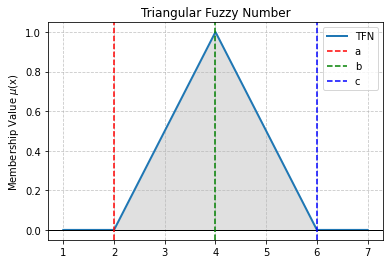

In [232]:
# Example visualization of single TFN
single_tfn_plot(2, 4, 6)

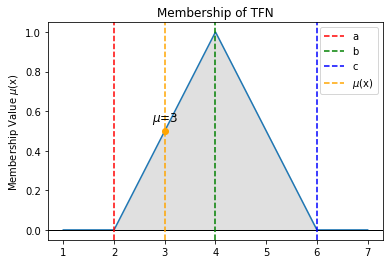

In [233]:
# Example visualization of TFN membership degree
tfn_membership_plot(2, 4, 6, 3)

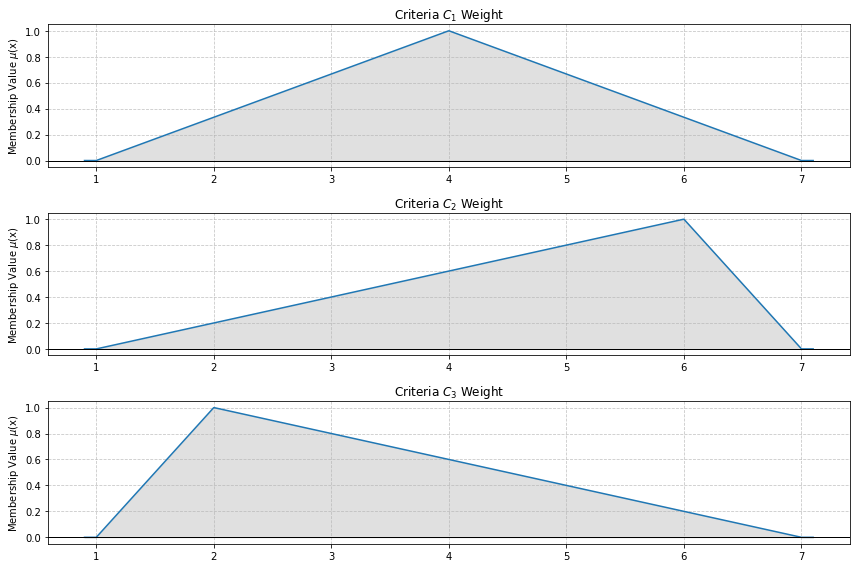

In [234]:
# Example visualization of TFN criteria plot
tfn_criteria_plot([[1, 4, 7], [1, 6, 7], [1, 2, 7]])

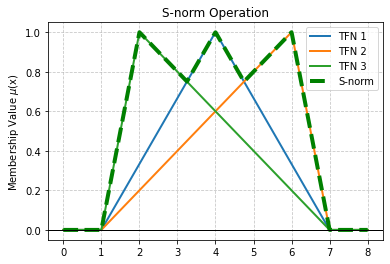

In [235]:
# Example visualization of S-norm TFN plot
s_norm_tfn_plot([[1, 4, 7], [1, 6, 7], [1, 2, 7]])